In [85]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

In [86]:
data=pd.read_csv("/content/bank.csv", sep=',')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [88]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [89]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [90]:
data.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [91]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [92]:
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

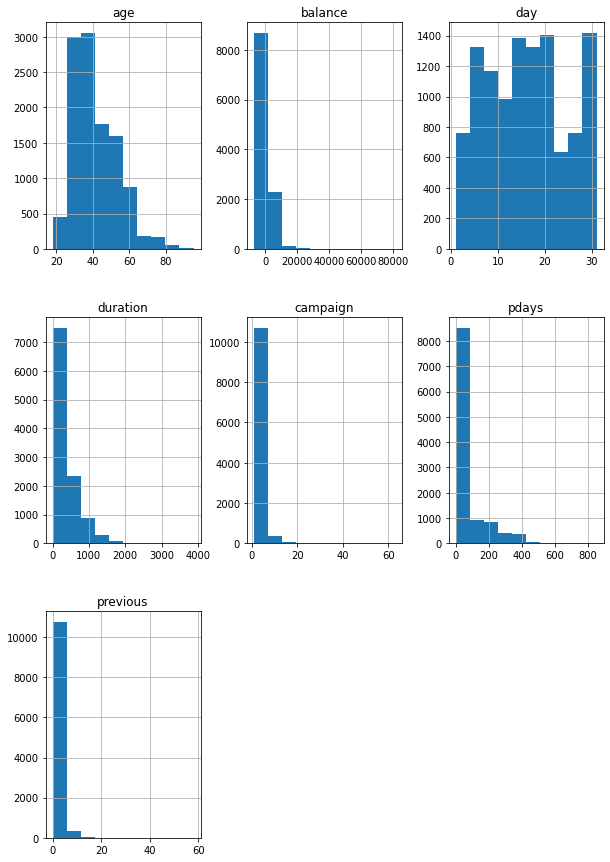

In [93]:
data.hist(figsize=(10,15))
plt.show()

In [94]:
data['job'] = data['job'].map({'admin.':0, 'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'management':4, 'retired':5,
                               'self-employed':6, 'services':7, 'student':8, 'technician':9, 'unemployed':10, 'unknown':11})

data['marital'] = data['marital'].map({'single':0, 'married':1, 'divorced':2})

data['education'] = data['education'].map({'primary':0, 'secondary':1, 'tertiary':2, 'unknown':3})

data['default'] = data['default'].map({'no':0, 'yes':1})

data['housing'] = data['housing'].map({'no':0, 'yes':1})

data['loan'] = data['loan'].map({'no':0, 'yes':1})

data['contact'] = data['contact'].map({'cellular':0, 'telephone':1, 'unknown':2})

data['month'] = data['month'].map({'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11})

data['poutcome'] = data['poutcome'].map({'failure':0, 'success':1, 'other':2, 'unknown':3})

data['deposit'] = data['deposit'].map({'no':0, 'yes':1})


In [95]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,4,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,4,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,4,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,4,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,4,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1,1,0,0,20,3,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,5,83,4,-1,0,3,0
11159,32,9,0,1,0,29,0,0,0,19,7,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,4,9,2,172,5,0,0


In [96]:
X = data[['age','job','marital','education','default','balance','housing','loan','contact','day',
      'month','duration','campaign','pdays','previous', 'poutcome']]
Y = data['deposit']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state=20)

In [97]:
model = Sequential()
model.add(Dense(128, input_dim = 16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [100]:
mycallbacks = [EarlyStopping(monitor='val_loss', patience=2)]
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), batch_size = 32) #callbacks = mycallbacks)

Epoch 1/10
280/280 [==============================] - 1s 2ms/step - loss: 22.8347 - accuracy: 0.6002 - val_loss: 1.2740 - val_accuracy: 0.7470
Epoch 2/10
280/280 [==============================] - 0s 1ms/step - loss: 2.5920 - accuracy: 0.7021 - val_loss: 2.9400 - val_accuracy: 0.7049
Epoch 3/10
280/280 [==============================] - 0s 2ms/step - loss: 2.3292 - accuracy: 0.6884 - val_loss: 1.2552 - val_accuracy: 0.7568
Epoch 4/10
280/280 [==============================] - 0s 2ms/step - loss: 1.8753 - accuracy: 0.7111 - val_loss: 1.2994 - val_accuracy: 0.7125
Epoch 5/10
280/280 [==============================] - 0s 2ms/step - loss: 2.0533 - accuracy: 0.7143 - val_loss: 1.0444 - val_accuracy: 0.7228
Epoch 6/10
280/280 [==============================] - 0s 2ms/step - loss: 2.1913 - accuracy: 0.7093 - val_loss: 1.9149 - val_accuracy: 0.7653
Epoch 7/10
280/280 [==============================] - 0s 2ms/step - loss: 2.6714 - accuracy: 0.7162 - val_loss: 5.7155 - val_accuracy: 0.6574
Epoch

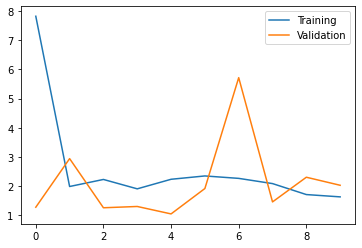

In [101]:
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.legend()

we should set the callback at epoch 5.